In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (14, 10)

### 데이터 불러오기

In [2]:
DATA_DIR = "data\고소차 Data"
filename = "\\20191101_20200318 tele_car_req.xlsx"
fpath = DATA_DIR + filename
df = pd.read_excel(fpath)
# df.drop(df["Unnamed: 0"])

In [3]:
df.drop(['arng_cnfm_emp_no', 'arng_cnfm_emp_name', 'aply_date', 'ogan_name_kor-2','ogan_name_kor-3', 'ogan_name_kor-4', 
         'actl_dept_desc', 'rgsr_dept_desc', 'up_user', 'in_user', 'rgsr_user_id', 'rgsr_user_name', 'actl_use_emp_no', 
         'actl_use_emp_name', 'work_grp_code', 'work_grp_desc', 'in_dt', 'up_dt', 'req_st_time', 'req_fin_time'], 
        axis=1, inplace = True)

df = pd.DataFrame(df, columns = ['eqp_id', 'req_no', 'proj_no', 'blk_no', 'use_date', 'req_st_date', 'req_fin_date', 
                                 'eqp_spec_code', 'eqp_req_qty', 'detl_work_desc', 'ogan_name_kor', 'arng_emp_no', 
                                 'arng_emp_name', 'work_zone_code', 'work_zone_desc', 'eqp_kind_code', 'eqp_kind_desc'])
df

,eqp_id,req_no,proj_no,blk_no,use_date,req_st_date,req_fin_date,eqp_spec_code,eqp_req_qty,detl_work_desc,ogan_name_kor,arng_emp_no,arng_emp_name,work_zone_code,work_zone_desc,eqp_kind_code,eqp_kind_desc
0,N-182,20191021020,2479,80B,20191024,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
1,N-182,20191021020,2479,80B,20191025,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
2,N-182,20191021020,2479,80B,20191026,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
3,N-182,20191021020,2479,80B,20191027,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
4,N-182,20191021020,2479,80B,20191028,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,S-112,20200131012,4321,NaN,20200227,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54086,S-112,20200131012,4321,NaN,20200228,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54087,S-112,20200131012,4321,NaN,20200229,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54088,S-112,20200131012,4321,NaN,20200301,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카


In [4]:
df['proj_no'] = df['proj_no'].astype('str')

df['eqp_spec_code'] = df['eqp_spec_code'].astype('str')

df['work_zone_code'] = df['work_zone_code'].astype('str')
# df['work_grp_code'] = df['work_grp_code'].astype('str')

df['req_fin_date'] = df['req_fin_date'].astype('str')
df['req_st_date'] = df['req_st_date'].astype('str')
df['use_date'] = df['use_date'].astype('str')
df['req_no'] = df['req_no'].astype('str')



In [5]:
df.sort_values(by=['req_no', 'use_date'])
# # df[df['req_o'] == '20191021020']
# for req in df['req_no']:
#     print(len(req.value_counts()))
    

print(df['req_no'].value_counts())

20191129038    560
20191031004    506
20200131049    476
20191022002    473
20191231011    422
              ... 
20200311026      1
20191122006      1
20200218022      1
20200130030      1
20200221017      1
Name: req_no, Length: 2483, dtype: int64


In [6]:
df = df.sort_values(['use_date', 'req_no', 'eqp_id'])
df

,eqp_id,req_no,proj_no,blk_no,use_date,req_st_date,req_fin_date,eqp_spec_code,eqp_req_qty,detl_work_desc,ogan_name_kor,arng_emp_no,arng_emp_name,work_zone_code,work_zone_desc,eqp_kind_code,eqp_kind_desc
14185,N-379,20191011015,2479,NaN,20191012,20191012,20191111,38M,5,NaN,(주)기륭이엔지,421542,주영철,7,1도크 바닥,N,고소차
17954,N-418,20191011015,2479,NaN,20191012,20191012,20191111,38M,5,NaN,(주)기륭이엔지,421542,주영철,7,1도크 바닥,N,고소차
18422,N-422,20191011015,2479,NaN,20191012,20191012,20191111,38M,5,NaN,(주)기륭이엔지,421542,주영철,7,1도크 바닥,N,고소차
18564,N-423,20191011015,2479,NaN,20191012,20191012,20191111,38M,5,NaN,(주)기륭이엔지,421542,주영철,7,1도크 바닥,N,고소차
21675,N-450,20191011015,2479,NaN,20191012,20191012,20191111,38M,5,NaN,(주)기륭이엔지,421542,주영철,7,1도크 바닥,N,고소차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15427,N-392,20200316020,5467,80A,20200318,20200317,20200318,22M,1,80A 선수 I.C.C.P 설치작업 및 검사,배진기업-배진생산6반,383525,주효권,12,2도크 P.E 2공장,N,고소차
15055,N-389,20200316022,606D,9G2,20200318,20200318,20200318,28M,1,정도 계측 관련 작업,(주)대신-대신생산1반,400950,장정덕,36,E4안벽,N,고소차
38468,N-587,20200317006,2487,844,20200318,20200318,20200318,38M,1,선수마크 수정,자오기업-대조 검사반,421542,주영철,7,1도크 바닥,N,고소차
16148,N-399,20200317015,3333,NaN,20200318,20200318,20200318,22M,1,TTC-7 충돌방지장치 설치작업,출입확인_YARD,421553,주용제,1,1DOCK도장공장(셀타),N,고소차


### 사용시작일, 사용종료일, 시작일 차이 계산

In [7]:
sample_df = df[['eqp_id', 'req_no', 'proj_no', 'use_date', 'req_st_date', 'req_fin_date', 'eqp_spec_code', 'eqp_req_qty', 
                'ogan_name_kor', 'work_zone_code', 'work_zone_desc', 'eqp_kind_code']].copy()

sample_df['req_st_date'] = pd.to_datetime(sample_df['req_st_date'])
sample_df['req_fin_date'] = pd.to_datetime(sample_df['req_fin_date'])

sample_df['days_of_req'] = sample_df['req_fin_date'] - sample_df['req_st_date']
sample_df['days_of_req'] = sample_df['days_of_req'].dt.days

sample_df = sample_df.groupby(['proj_no', 'req_no', 'eqp_id']).first().reset_index()
sample_df
sample_df.to_csv("days of req.csv", mode='w')

### 1) 사용기간 (일자)

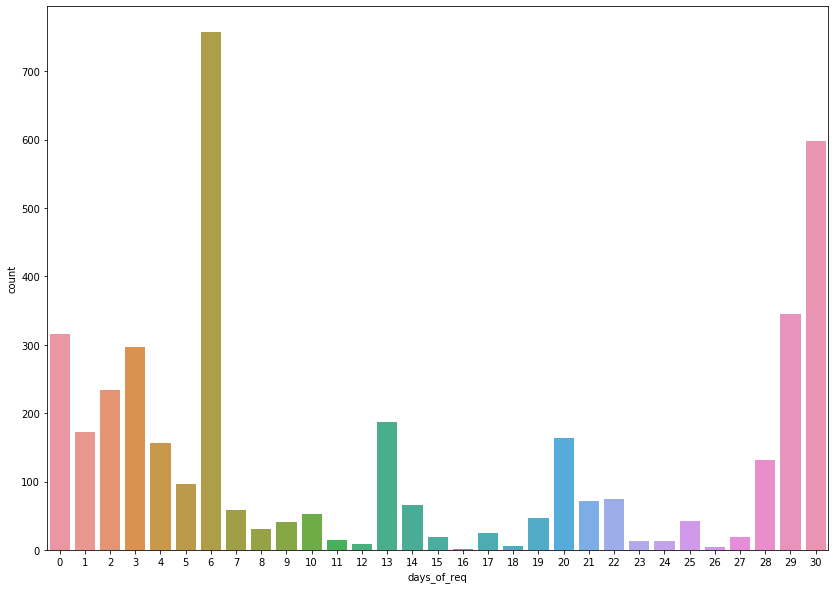

In [62]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(x='days_of_req', data=sample_df)

### 2) 고소차 신청 높이별 사용기간

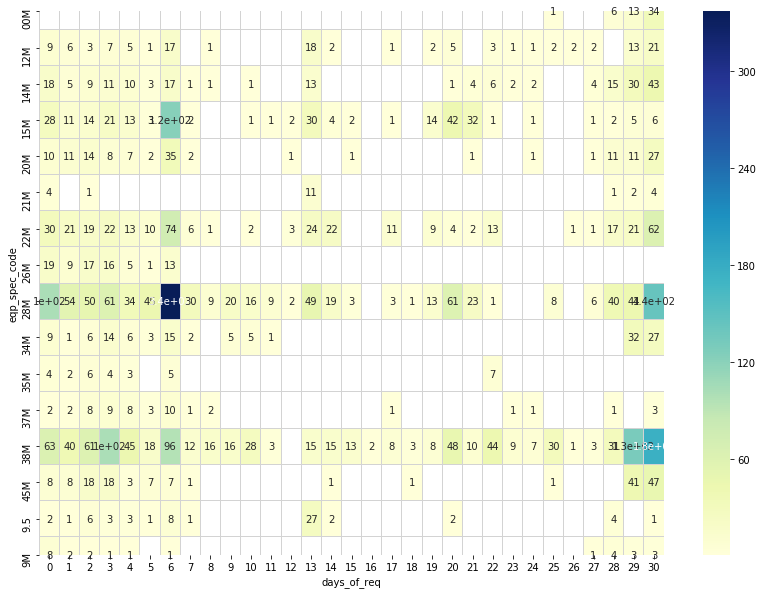

In [9]:
eqp_spec_df = sample_df
eqp_spec_df = eqp_spec_df.groupby(['eqp_spec_code', 'days_of_req']).agg({'days_of_req': 'count'}).rename(columns={'days_of_req':'count'}).reset_index()
eqp_spec_df = eqp_spec_df.pivot_table(index='eqp_spec_code', columns='days_of_req', values='count', fill_value=None)

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(eqp_spec_df, annot=True, cmap="YlGnBu", ax=ax, linewidths=0.01, linecolor='lightgrey')

### 3) 장비별 신청일 (평균, 최소, 최대, 건수)

In [10]:
# sample_df.groupby(['eqp_id']).agg({'days_of_req': ['mean', 'min', 'max', 'count']}).to_csv("111.csv", mode="w")
sample_df.groupby(['eqp_id']).agg({'days_of_req': ['mean', 'min', 'max', 'count']})

days_of_req              
              mean min max count
eqp_id                          
N-182    28.333333  22  30     6
N-183    29.750000  29  30     4
N-184    16.625000   0  30     8
N-185    29.750000  29  30     4
N-186    19.166667  15  21     6
...            ...  ..  ..   ...
S-108    29.250000  28  30     4
S-109    29.250000  28  30     4
S-110    12.500000   3  21     4
S-111    29.750000  29  30     4
S-112    29.750000  29  30     4

[459 rows x 4 columns]

### 4) Project별 신청일 (평균, 최소, 최대, 건수)

In [11]:
sample_df.groupby(['proj_no']).agg({'days_of_req' : ['mean', 'min', 'max', 'count']})

days_of_req              
               mean min max count
proj_no                          
-          0.481481   0   3    27
0          1.901408   0  30    71
1          0.666667   0   1     3
1111       1.000000   1   1     2
1DOC       0.000000   0   0     2
...             ...  ..  ..   ...
P606       2.000000   0   6     3
PAS        0.250000   0   1     4
PMS        0.000000   0   0     1
POS2       1.000000   1   1     2
TX         2.000000   2   2     1

[92 rows x 4 columns]

### 5) 월별 신청일 (평균, 최소, 최대, 건수)

In [12]:
sample_df['req_st_month'] = sample_df['req_st_date'].dt.month
sample_df.groupby(['req_st_month']).agg({'days_of_req': ['mean', 'max', 'min', 'count']})

days_of_req              
                    mean max min count
req_st_month                          
1              14.992231  30   0   901
2              13.024112  30   0   788
3               4.286957  15   0   230
10             20.603306  30   1   242
11             13.357998  30   0   919
12             12.621677  30   0   978

### 6) 월별 히스토그램 분포도 (KDE)

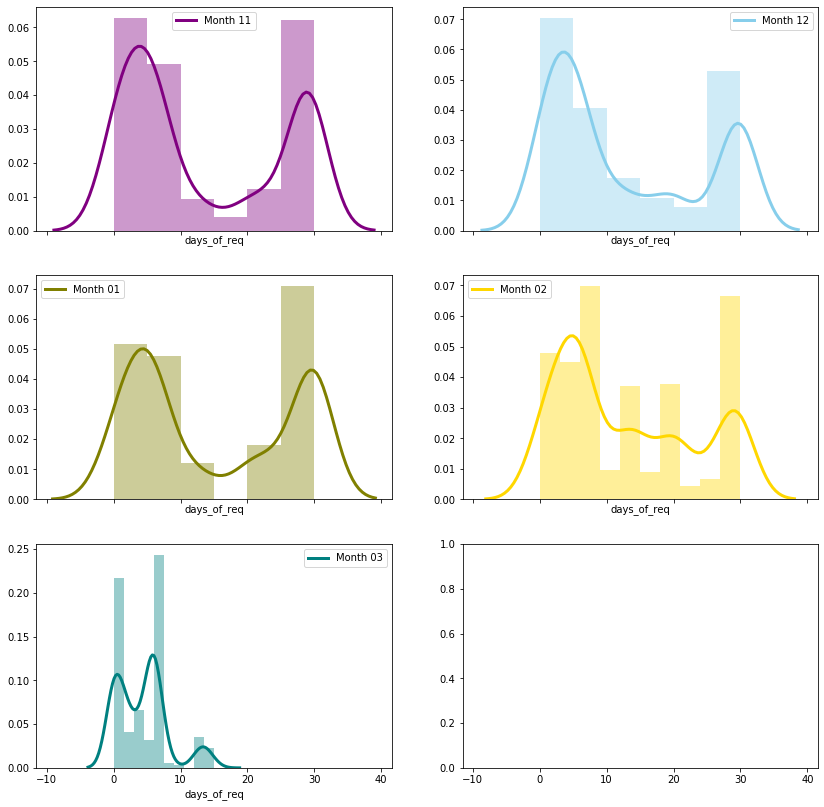

In [66]:
f, axes = plt.subplots(3, 2, figsize=(14, 14), sharex=True)
sns.distplot(sample_df[sample_df['req_st_month'] == 11]['days_of_req'], color="purple", ax=axes[0, 0], kde_kws={"color": "purple", "lw": 3, "label": "Month 11"})
sns.distplot(sample_df[sample_df['req_st_month'] == 12]['days_of_req'], color="skyblue", ax=axes[0, 1], kde_kws={"color": "skyblue", "lw": 3, "label": "Month 12"})
sns.distplot(sample_df[sample_df['req_st_month'] == 1]['days_of_req'] , color="olive", ax=axes[1, 0], kde_kws={"color": "olive", "lw": 3, "label": "Month 01"})
sns.distplot(sample_df[sample_df['req_st_month'] == 2]['days_of_req'], color="gold", ax=axes[1, 1], kde_kws={"color": "gold", "lw": 3, "label": "Month 02"})
sns.distplot(sample_df[sample_df['req_st_month'] == 3]['days_of_req'], color="teal", ax=axes[2, 0], kde_kws={"color": "teal", "lw":3, "label": "Month 03"})

### 7) 월별 신청일수 카운트

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


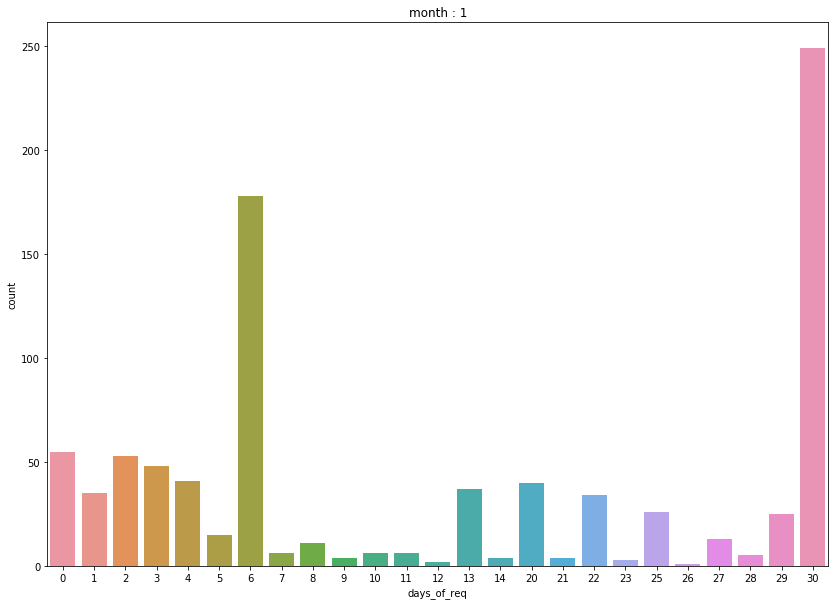

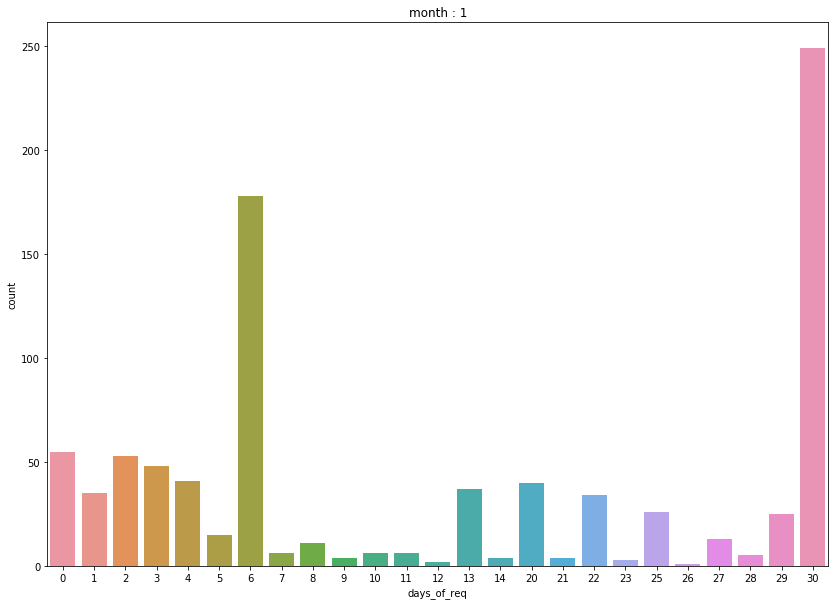

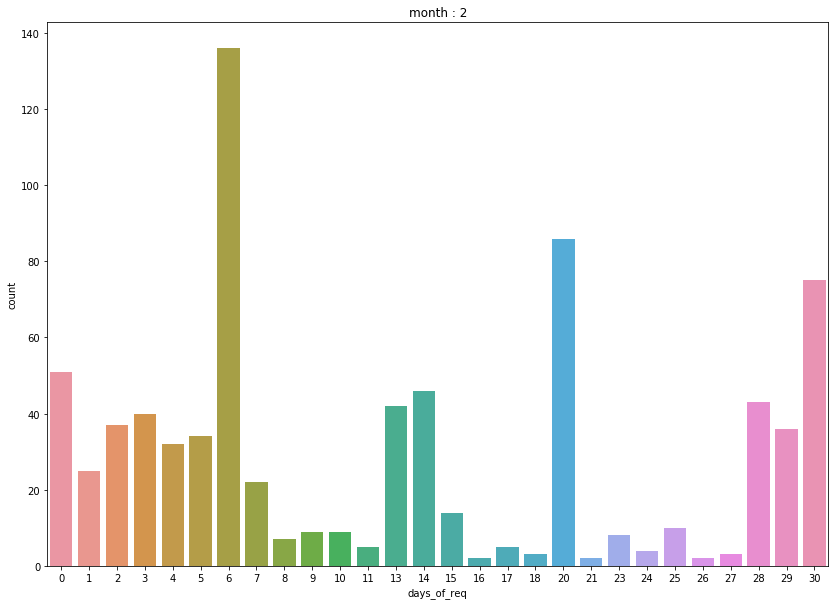

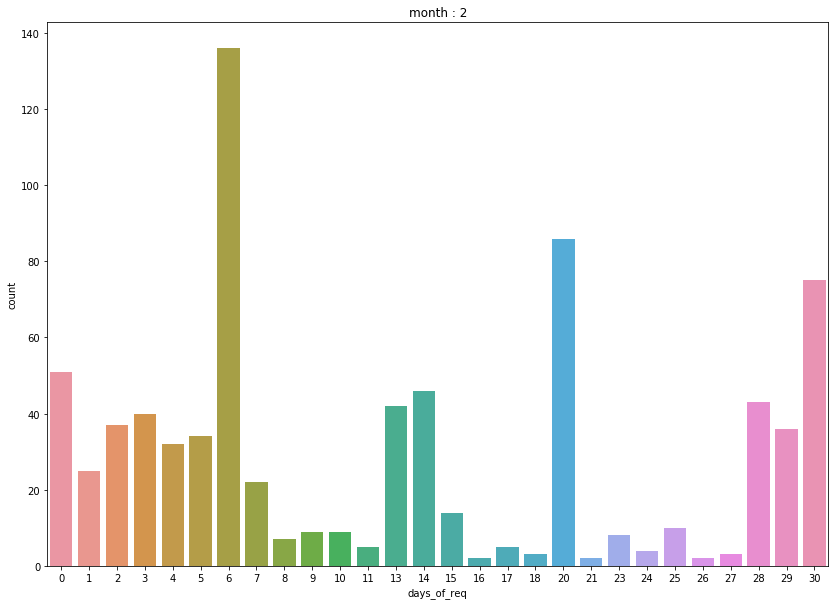

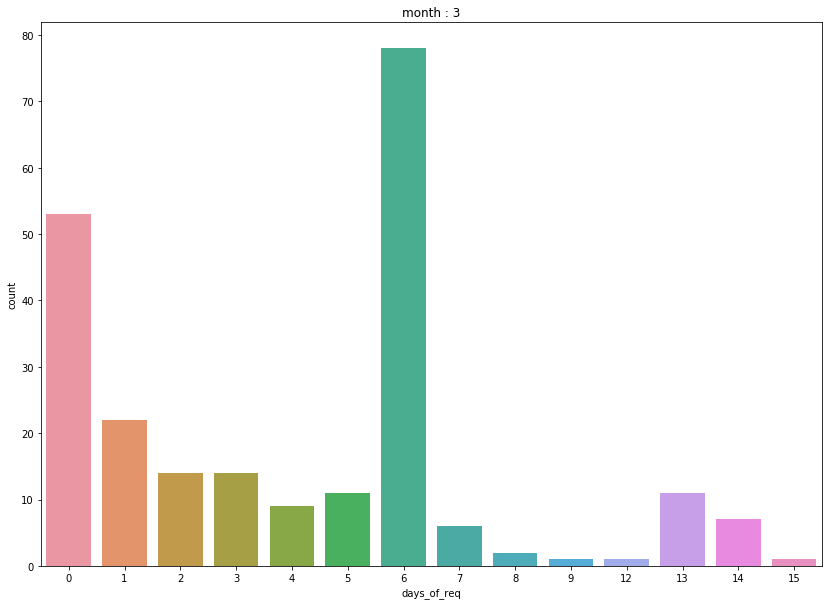

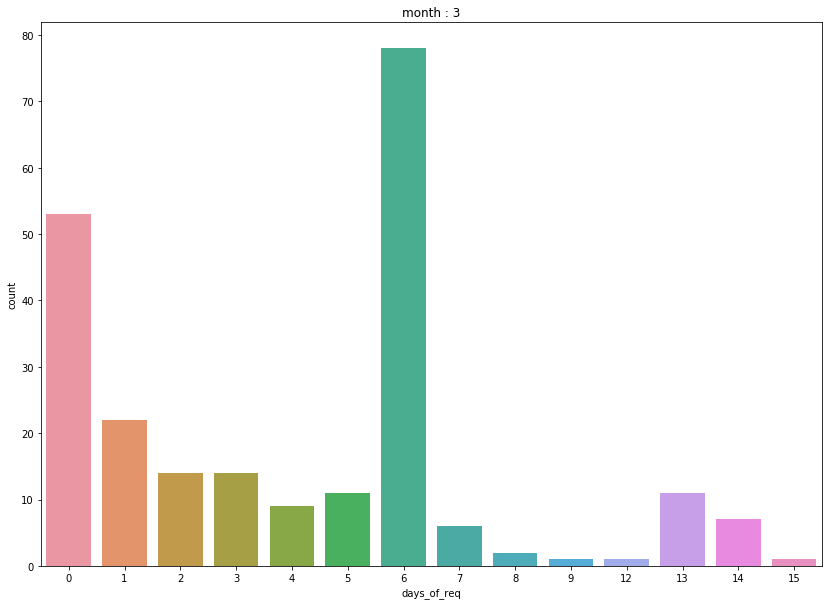

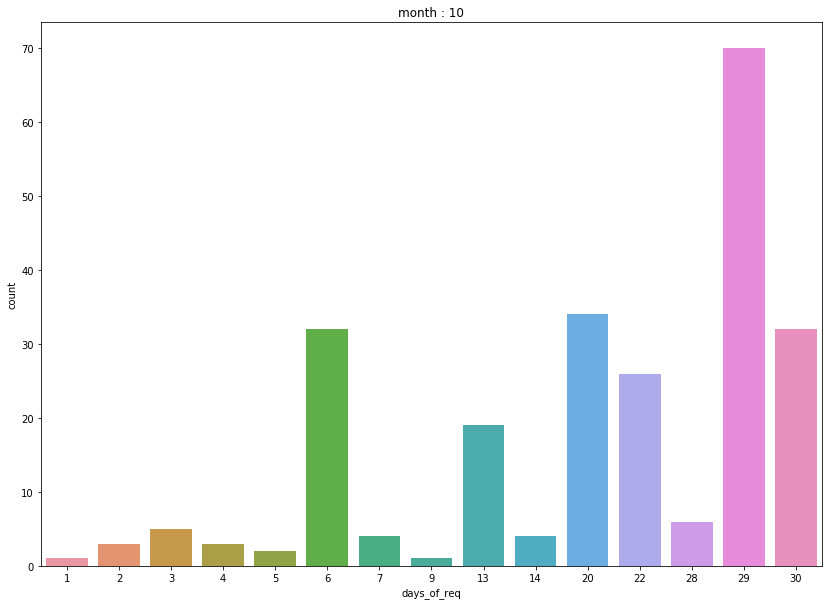

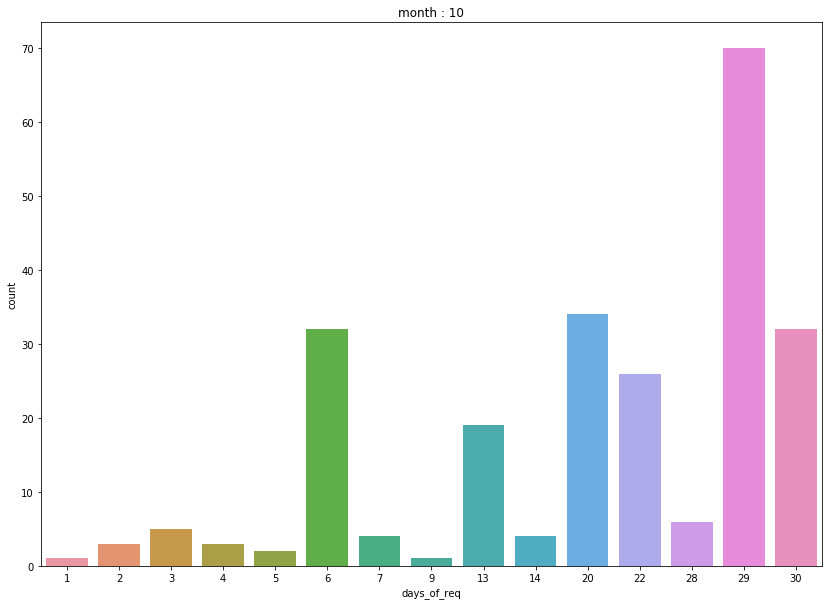

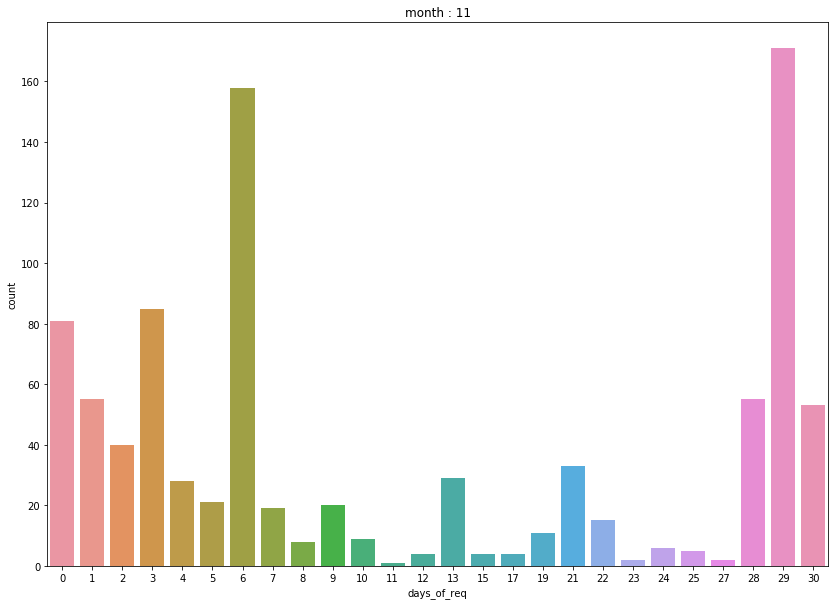

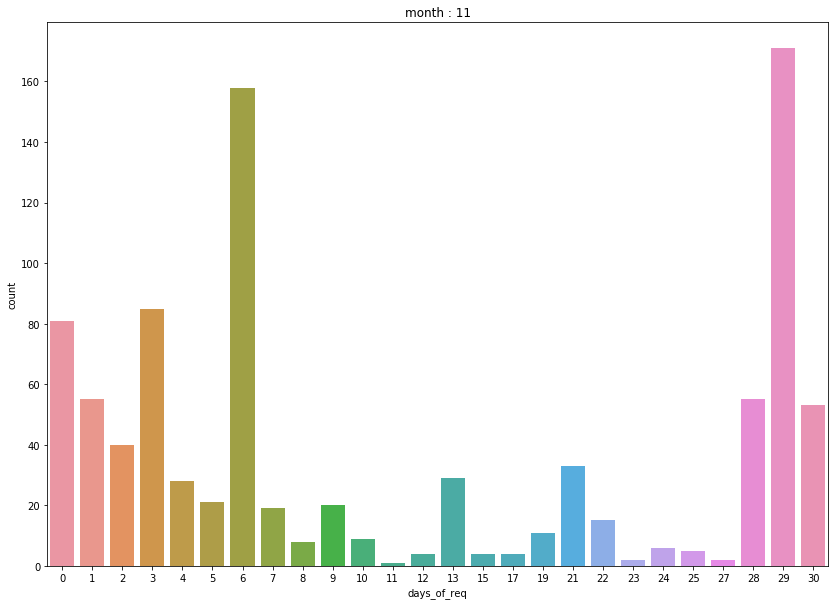

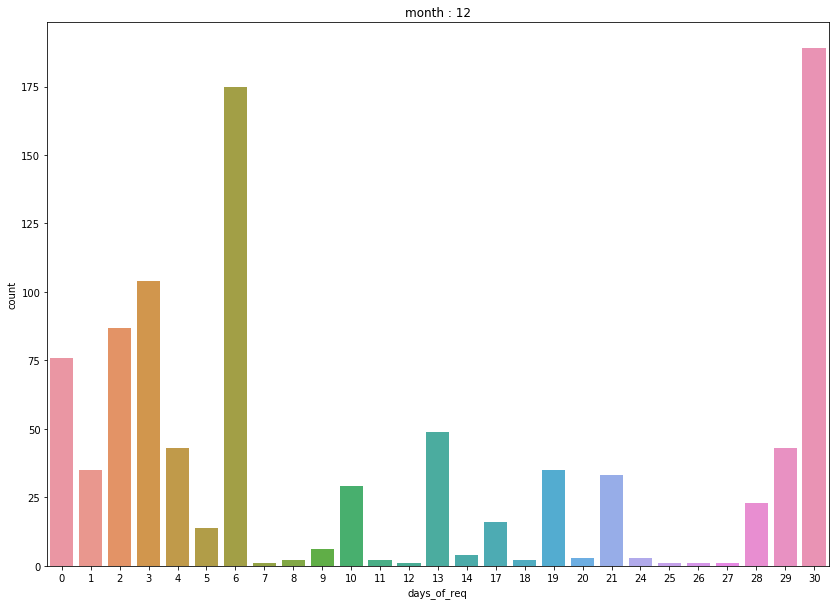

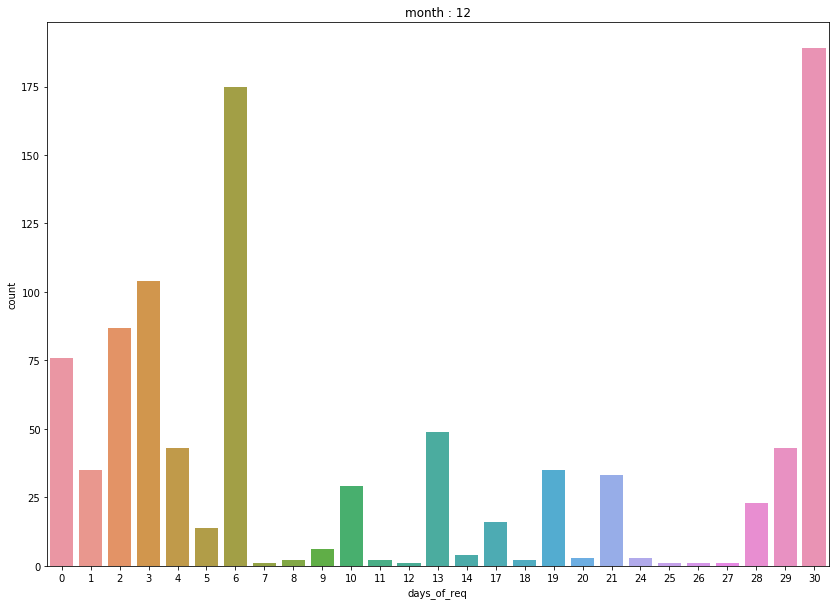

In [33]:
for month in sorted(sample_df['req_st_month'].unique()):    
    print("=" * 100)
    
    sns.countplot(x='days_of_req', data=sample_df[sample_df['req_st_month'] == month])
    plt.title("month : {}".format(month))
    plt.show()
    
    sns.countplot(x='days_of_req', data=sample_df[sample_df['req_st_month'] == month])
    plt.title("month : {}".format(month))
    plt.show()

### 8) 장비별 신청일수 분포

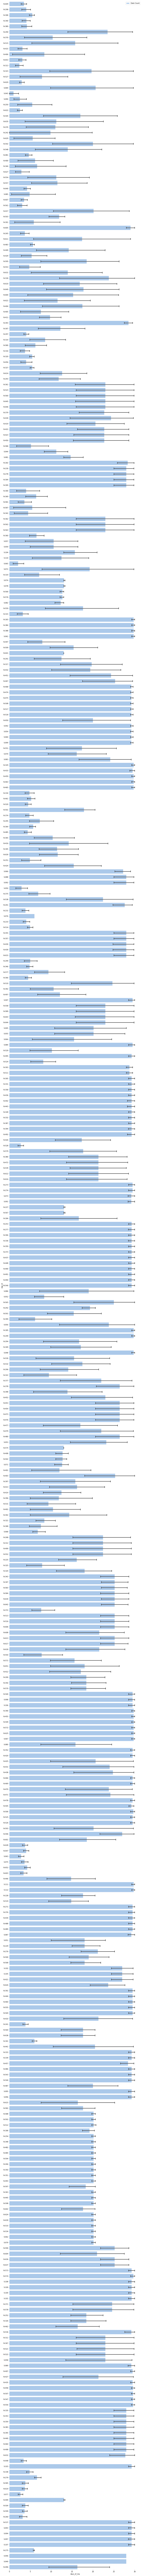

In [56]:
f, ax = plt.subplots(figsize =(15,300))

sns.set_color_codes('pastel')
sns.barplot(x ='days_of_req', y = 'eqp_id', data = sample_df,
            label = 'Date Count', color = 'b', edgecolor = 'w', capsize=.2)

ax.legend(ncol = 3, loc = 'upper right')
sns.despine(left = True, bottom = True)

plt.show()